<a href="https://colab.research.google.com/github/HMUNACHI/fashion_classification_software/blob/master/Fashion_Classification_Software.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# this installs the helper function, then restart the runtime to activate
!wget -c https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py

In [8]:
# imports the dependencies
%matplotlib inline
import helper
from __future__ import print_function
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch import optim

# this would transform the data to tensors and normalise the data
transform = transforms.Compose([transforms.ToTensor(), 
                                transforms.Normalize((0.5,),(0.5,))
                                ])

# loading the dataset from MNIST
trainset = datasets.FashionMNIST(
                          root = './data/FashionMNIST',
                          download = True, 
                          train = True, 
                          transform = transform)

# shuffles and loads the data in batches of 64
trainloader = torch.utils.data.DataLoader(trainset, 
                                          batch_size = 64, 
                                          shuffle = True)
# defines the model
model = nn.Sequential(nn.Linear(784, 256),
                     nn.ReLU(),
                     nn.Linear(256, 128),
                     nn.ReLU(),
                     nn.Linear(128, 64),
                     nn.ReLU(),
                     nn.Linear(64, 10),
                     nn.LogSoftmax(dim=1))

# sets the criterion, optimiser and epochs
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.003)
epochs = 5


# training begins
for e in range(epochs):
    running_loss = 0

    for images, labels in trainloader: 

        # flattens the images to a one dimensional array
        images = images.view(images.shape[0], -1)

        # clears the gradients
        optimizer.zero_grad()

        # forward pass
        output = model.forward(images)
        
        # calculate the loss
        loss = criterion(output, labels)
        
        # back propagation
        loss.backward()
        
        #adjust weights
        optimizer.step()
        
        # updates the running loss
        running_loss += loss.item()
    
    # prints the running loss as the model is trained
    else: print(f"Training Loss: ", {running_loss/len(trainloader)})


Training Loss:  {0.5171851373907091}
Training Loss:  {0.38809302627150694}
Training Loss:  {0.35783261583367393}
Training Loss:  {0.3360273748842765}
Training Loss:  {0.31900056021045775}


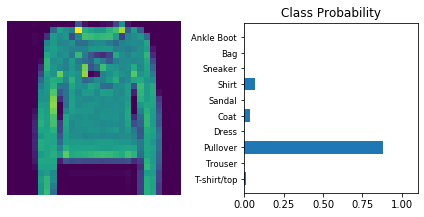

In [12]:
# testing how well the model predicts mumbers

images, labels = next(iter(trainloader))
img = images[0].view(1,784)

with torch.no_grad():
    logits = model.forward(img)

ps = F.softmax(logits,dim=1)
helper.view_classify(img.view(1,28,28), ps, version='Fashion')